# Salary Prediction for STEM Based Jobs

--> Analysis of a Dataset that contains information about STEM Based salaries (Source: Kaggle).

--> Creating and Implementing a Machine Learning Model to Predict the salary of an employee.

--> Analyzing the data and drawing conclusions.


## Understanding the Data

### Importing the Necessary Libraries

In [29]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import explained_variance_score

### Displaying the DataSet and some Basic Information

In [30]:
df = pd.read_csv('stem_salary_data.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [32]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


--> Based on an initial look at the data, we can say that it is an extensive and detailed dataset which sould be able to povide us a lot of information.

--> Due to the size of the dataset, ML models is expected to have a decent accuracy

--> The Correlation Matrix, gives us a basic idea of how different parameters affect the salaries

### Exploring the Data and Understanding more about it...

#### What are the trends in Education

Education
Bachelor's Degree    177845.409095
Highschool           187731.250000
Master's Degree      220731.076603
PhD                  291865.531415
Some College         210121.126761
Name: totalyearlycompensation, dtype: float64


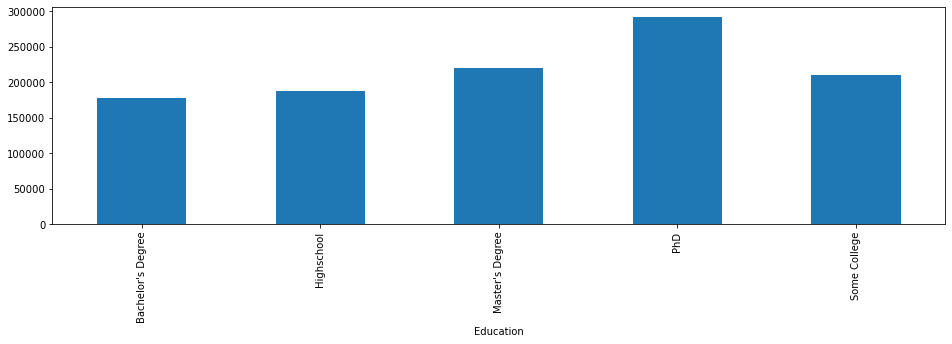

In [34]:
mean_data = df["totalyearlycompensation"].groupby(df["Education"]).agg("mean")
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

Education
Bachelor's Degree    12601
Highschool             320
Master's Degree      15391
PhD                   1703
Some College           355
Name: totalyearlycompensation, dtype: int64


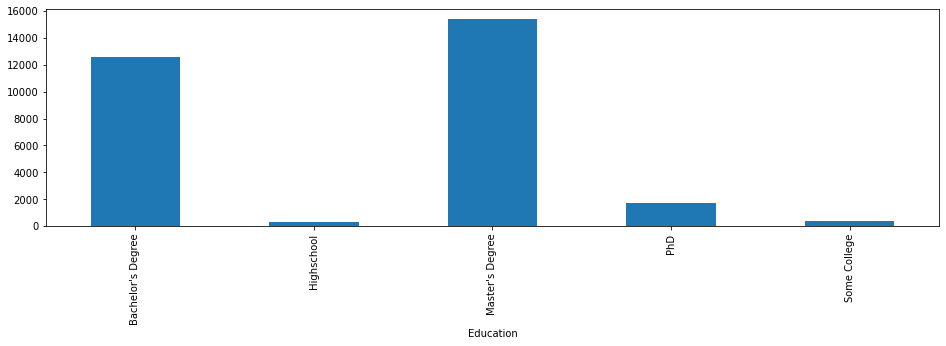

In [35]:
mean_data = df["totalyearlycompensation"].groupby(df["Education"]).agg('count')
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

--> As far as yearly compensation is given, we can see that Ph.D.'s get a significantly higher yearly compensation

--> Surpisingly bachelors and highschool have a similar statistical data

--> But it is imperitive that we factor in cases of confounder's and also consider that the number of students in each field varies (as as shown above)

--> I was surprised by the fact that there are more Masters graduating students than Undergraduate students.

#### Trends in Job Types

title
Business Analyst                  885
Data Scientist                   2578
Hardware Engineer                2200
Human Resources                   364
Management Consultant             976
Marketing                         710
Mechanical Engineer               490
Product Designer                 1516
Product Manager                  4673
Recruiter                         451
Sales                             461
Software Engineer               41231
Software Engineering Manager     3569
Solution Architect               1157
Technical Program Manager        1381
Name: totalyearlycompensation, dtype: int64


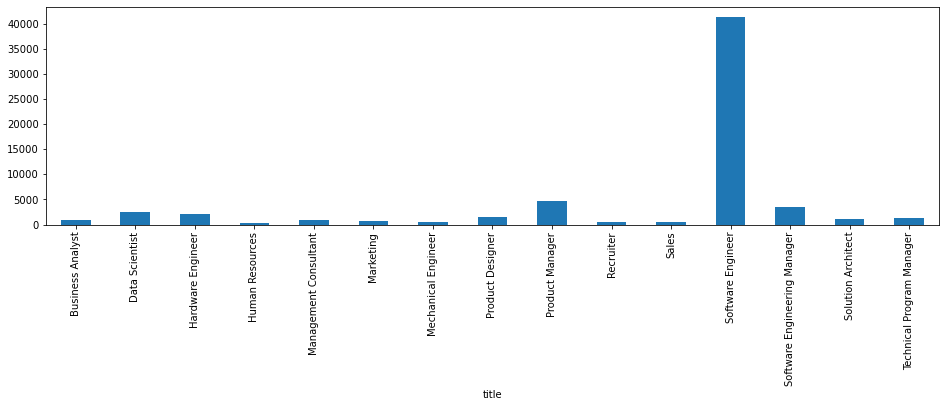

In [36]:
mean_data = df["totalyearlycompensation"].groupby(df["title"]).agg("count")
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

title
Business Analyst                129727.683616
Data Scientist                  203656.710628
Hardware Engineer               213655.000000
Human Resources                 178711.538462
Management Consultant           162795.081967
Marketing                       198971.830986
Mechanical Engineer             158442.857143
Product Designer                207637.203166
Product Manager                 257813.396105
Recruiter                       155580.931264
Sales                           214273.318872
Software Engineer               205403.992287
Software Engineering Manager    354635.752312
Solution Architect              212736.387208
Technical Program Manager       237099.927589
Name: totalyearlycompensation, dtype: float64


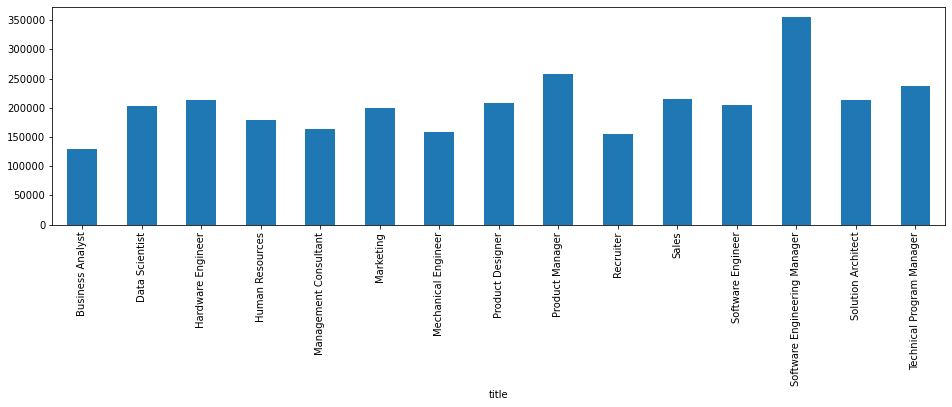

In [37]:
mean_data = df["totalyearlycompensation"].groupby(df["title"]).agg("mean")
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

--> The most common job is that of a Software Engineer

--> The highest paying job is that of a Software Engineer Manager

#### Checking for Inequality in Gender

--> In important issue that we must address

--> Checking for Gender based inequality

gender
Female                             195119.588513
Male                               212446.977928
Other                              232347.500000
Title: Senior Software Engineer    205000.000000
Name: totalyearlycompensation, dtype: float64


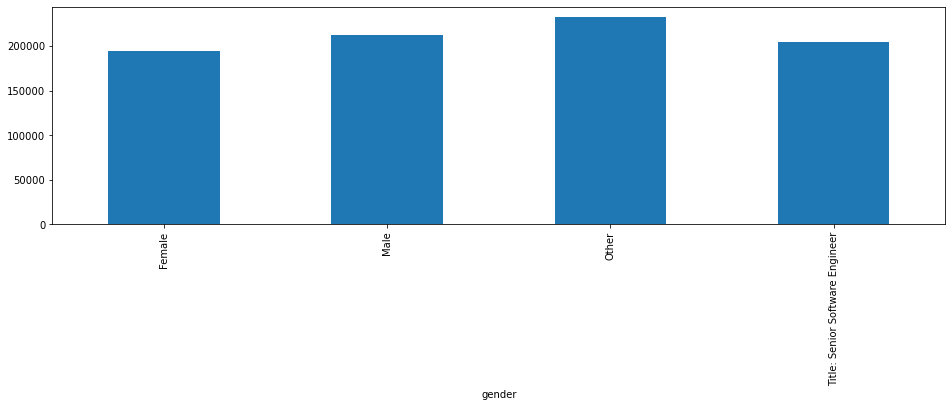

In [38]:
mean_data = df["totalyearlycompensation"].groupby(df["gender"]).agg("mean")
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

gender
Female                              6999
Male                               35702
Other                                400
Title: Senior Software Engineer        1
Name: totalyearlycompensation, dtype: int64


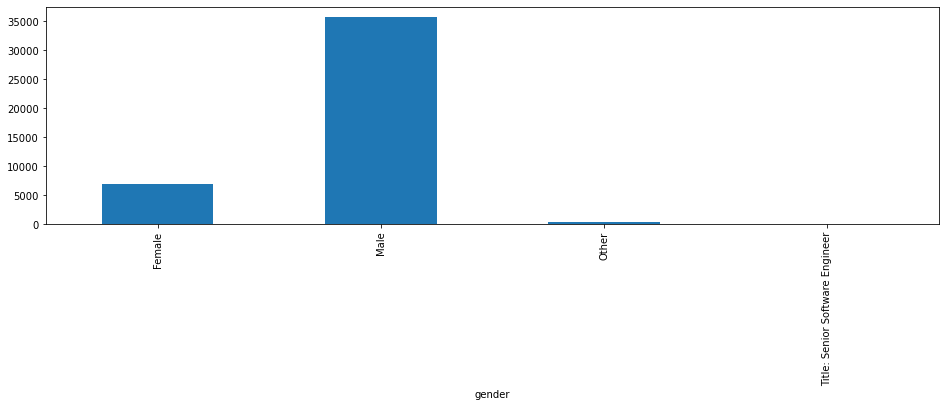

In [39]:
mean_data = df["totalyearlycompensation"].groupby(df["gender"]).agg("count")
print(mean_data)
mean_data.plot(kind="bar",figsize=(16,4))
plt.show()

--> Here we can see that there are more men in the STEM workforce.

--> We can also see a slight difference in the total yearly compensation between people of different genders.

### Data Visualization

--> A visual representation would provide far more detail of how all the factors relate

--> This helps us get a sense of direction on how to proceed with the analysis

<AxesSubplot:>

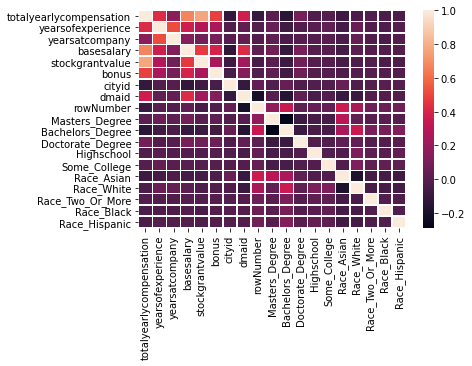

In [40]:
sns.heatmap(df.corr(), linewidths=0.5)

Based on these heatmaps we can draw a few conclusion: 

--> There are certain aspects that have a strong correlation with the 'totalyearlycompensation' like - basesalary and stockgrantvalue. (r ~ 0.7)

--> Something important to note is that the total yearly compensation is also a direct part of the revenue per year, and hence it is important to use that, but also find a model where we don't have to rely on the 'stockgrantvalue'. This is because when someone wants to make a prediction about yearly compensation, they may not know the stock grant value that the employee may receive.

--> A few more columns, with a lower correlation that related with the data were: 'yearsofexperience' and 'bonus'

--> It was surprising to note that 'yearsatcompany' did not play such a big role in the total yearly compensation.

--> The above columns can be used regressively and we can find an accurate model.

--> Something else that also needs to be taken care of is Categorical Data which I will handle later while implementing ML Models.

--> As far as Regression models are concerned, we need to see if we should use single linear with one string correlation or multiple linear with lesser correlation but more 'X' values

--> Lets see a few more visualization on how columns correlate

<AxesSubplot:xlabel='stockgrantvalue', ylabel='totalyearlycompensation'>

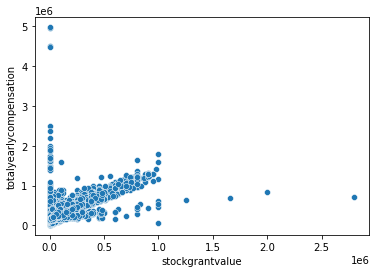

In [41]:
sns.scatterplot(y = df['totalyearlycompensation'], x = df['stockgrantvalue'])

Thus in the above case we can see that after 1 (as on the graph) the data is out of bonds and this would be extrapolation.

<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

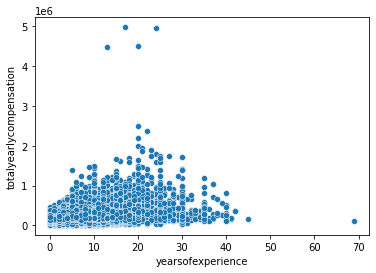

In [42]:
sns.scatterplot(y = df['totalyearlycompensation'], x = df['yearsofexperience'])

This clearly has a weeker correlation, but we can be also note that the range is similar after which any prediction would be extrapolation

## Cleaning the Data and Data PreProcessing

### Removing Unecessary Columns


--> Some of the Categorical Columns, do not appear to have any realtion with the data set, and due to label encoding, the size of the dataset becomes very big – this it becomes very hard to run a model.

--> Will be removing the column along with the NA values

### Removing NA Values

In [43]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

--> For the first Column of Company, we can simply remove those rows. This prevents in errors while running training algorithms. Morover, we have huge dataset and dropping a small percentage of that would not affect the Prediction.

--> While it is not ideal to drop certain columns, we can do so when we don't have enough information about them, and also in these cases where there are too many NA values.

--> Columns that I will be dropping are : Gender, OtherDetails, Race, Education

--> While some categories seem very usefull like Education, it is unfortunate that in this case due to less data I have to drop those columns.

--> However, it is important to note that while we are not losing any data we are still able to see its applications in the salary with its categorical representation in the DataSet using label encoding.

In [44]:
df = df.drop(columns = ['gender', 'otherdetails', 'Race', 'Education', 'timestamp', 'level', 'tag', 'rowNumber', 'dmaid'])
df.isna().sum()

company                    5
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

In [45]:
df = df.dropna()
df.isna().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
basesalary                 0
stockgrantvalue            0
bonus                      0
cityid                     0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
dtype: int64

### Converting the Data into a Desirable form

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62637 entries, 0 to 62641
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   title                    62637 non-null  object 
 2   totalyearlycompensation  62637 non-null  int64  
 3   location                 62637 non-null  object 
 4   yearsofexperience        62637 non-null  float64
 5   yearsatcompany           62637 non-null  float64
 6   basesalary               62637 non-null  float64
 7   stockgrantvalue          62637 non-null  float64
 8   bonus                    62637 non-null  float64
 9   cityid                   62637 non-null  int64  
 10  Masters_Degree           62637 non-null  int64  
 11  Bachelors_Degree         62637 non-null  int64  
 12  Doctorate_Degree         62637 non-null  int64  
 13  Highschool               62637 non-null  int64  
 14  Some_College          

--> Categorical Data needs to be converted into a numeric form for us to do any analysis.

--> As we can see some of the categorical data like race..etc is already numeric, hence only that which is of Object type needs to be convered.

--> Thus we need to convert: 'company', 'level', 'title', 'location', 'tag'

In [47]:
categorical_list = ['company', 'title', 'location']
encoder = pd.get_dummies(df, columns = categorical_list)
df = encoder
df.columns

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'basesalary', 'stockgrantvalue', 'bonus', 'cityid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree',
       ...
       'location_Yeovil, EN, United Kingdom', 'location_Yerevan, ER, Armenia',
       'location_York, PA', 'location_Yorktown Heights, NY',
       'location_Yulee, FL', 'location_Zapopan, JA, Mexico',
       'location_Zaragoza, AR, Spain', 'location_Zug, ZG, Switzerland',
       'location_Zurich, ZH, Switzerland',
       'location_hod hasharon, HM, Israel'],
      dtype='object', length=2713)

In [48]:
df.head() # Just to view

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,...,"location_Yeovil, EN, United Kingdom","location_Yerevan, ER, Armenia","location_York, PA","location_Yorktown Heights, NY","location_Yulee, FL","location_Zapopan, JA, Mexico","location_Zaragoza, AR, Spain","location_Zug, ZG, Switzerland","location_Zurich, ZH, Switzerland","location_hod hasharon, HM, Israel"
0,127000,1.5,1.5,107000.0,20000.0,10000.0,7392,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100000,5.0,3.0,0.0,0.0,0.0,7419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,310000,8.0,0.0,155000.0,0.0,0.0,11527,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,372000,7.0,5.0,157000.0,180000.0,35000.0,7472,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,157000,5.0,3.0,0.0,0.0,0.0,7322,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Making Predictions and a MACHINE LEARNING MODEL

--> I hope to create a model such that one can predict the 'totalyearlycompensation'

--> At the same time by finding predictive models and checking its accuracy we can also find out which factors contribute to the data.

### Creating a Function for Accuracy Prediction

--> We learnt RMSE to find the error in a machine learning model.

--> With the same funtion I am using another model that will tell us the accuracy of the prediction.

--> The lower the error, the better the model fits, thus creating a function for the same.

In [49]:
def accuracy(y = []):
    score = explained_variance_score(df['totalyearlycompensation'], y)
    return score * 100

### Linear Regression

#### Simple Linear Regression using StockGrantValue

59.407239001517034


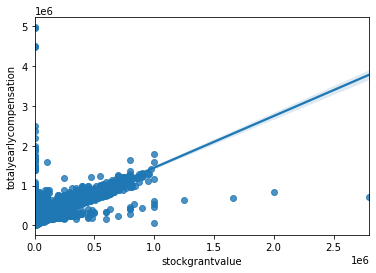

In [50]:
model = LinearRegression()
model.fit(df[['stockgrantvalue']], df['totalyearlycompensation'])
prediction = model.predict(df[['stockgrantvalue']])
sns.regplot(x = df[['stockgrantvalue']], y = df['totalyearlycompensation'])
print(accuracy(prediction))

--> What we can see based on this is that there is a strong correlation, but the accuracy score is low and can be better hence it its not the ideal model.

--> Another important correlation that we can derive, though obvious is that the stock grant has a strong correlation with the total yearly compensation.

--> But as stated before as well, it is important that we also find a model that can make such a conclusion without using the stockgrantvalue. This is because it is very possible that if someone wants to find out the predicted yearly compensation, they may not have data for the stockgrantvalue that the employee is going to recieve.

#### Simple Linear Regression Using basesalary

45.272221863757714


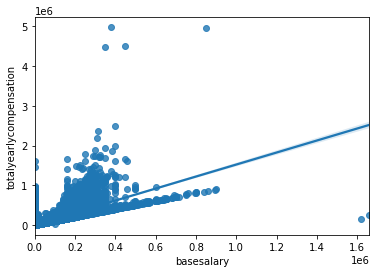

In [51]:
model = LinearRegression()
model.fit(df[['basesalary']], df['totalyearlycompensation'])
prediction = model.predict(df[['basesalary']])
sns.regplot(x = df[['basesalary']], y = df['totalyearlycompensation'])
print(accuracy(prediction))

--> As expected and shown by the correlation heatmap, we have some prediction, but it is not as accurate as we would like it to be.

--> But as far as a Simple Linear Regression, goes this is the only other accuarate solution that we can use without using stock grant value

--> We also need to see the accuracy of multiple linear regression

#### Multiple Linear Regression Using All Values that can be Used Regressively

In [52]:
regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary',	'stockgrantvalue', 'bonus']
model = LinearRegression()
model.fit(df[regression_list], df['totalyearlycompensation'])
prediction = model.predict(df[regression_list])
print(accuracy(prediction))

76.82849294669512


--> This model has a higher accuracy score and hence for sure we can use it to make predictions.

--> We also need to see how this would perform without stock grant value information.

In [53]:
regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary',	'bonus']
model = LinearRegression()
model.fit(df[regression_list], df['totalyearlycompensation'])
prediction = model.predict(df[regression_list])
print(accuracy(prediction))

53.63901082307745


--> As expected the accuracy of the model reduced, but with regression this is still a better bet.

--> One approach that we need to take while predicting is to use categorical data for our predictions...this may improve our accuracy and at the same time we do not need to worry about possible unknown data.

### Categorical Data

#### Prediction using all the Categorical Columns

--> We can either do clustering or Classification as they have several similarities and work on Categorical data

--> Based on some research I have decided to Use a Decision Tree Model.

--> One more issue with Classification is its runtime, Decision Tree would work well on our data and hence I selected that.

In [54]:
regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary',	'stockgrantvalue', 'bonus']
data = df.drop(columns = regression_list)

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X = data.drop(columns=['totalyearlycompensation'])
Y = df['totalyearlycompensation']
model.fit(X, Y)
prediction = model.predict(X)
accuracy(prediction)

46.982709795354815

--> This model did have an OK accuracy, but not nearly as much as needed to make accurate predictions.

--> Thus we need to use regressive models to predict the data.

--> This also indicates that while such factors like gender, education etc influence the data to make accurate predictions based on that.

### Selecting the Correct Model and Showing Residuals

--> Since the best Model is the one with 76.82 % Accuracy, we need to search for a model that has a higher accuracy and works with regression.

--> Below, the code implements the model as a function, that prints the accuracy and the residuals.

--> Thus the function implemented (after trying a few more regressive models), will be able to take in a dataset with certain columns and give out the predicted amount of yearlyrevenue with its accuracy score as well. This allows for a case where we may not know the stock grant value as well.

#### Some common code before we can try out models...

--> Based on some more research and reading, I decided to try out 3 regressive models.

In [56]:
regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary',	'stockgrantvalue', 'bonus']
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = XGBRegressor()
model.fit(df[regression_list], df['totalyearlycompensation'])
prediction = model.predict(df[regression_list])
print(accuracy(prediction))

96.8197062123413


In [58]:
model = DecisionTreeRegressor()
model.fit(df[regression_list], df['totalyearlycompensation'])
prediction = model.predict(df[regression_list])
print(accuracy(prediction))

97.56629712829822


In [59]:
model = RandomForestRegressor()
model.fit(df[regression_list], df['totalyearlycompensation'])
prediction = model.predict(df[regression_list])
print(accuracy(prediction))

96.5013329126751


--> As we wanted the accuracy did improve, and hence the function should be implemented using Decision Tree Regressor

#### Implementing the Predictive Function

DETAILS: 

--> We have an option to calculate without knowing if the stockKnown exists or not

--> Need to ensure that the dataset passed has all the necessary columns

--> Print out the Prediction, Accuracy and the Residuals

In [60]:
def predict(df, stockKown = True): 
    if stockKown:
        regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary',	'stockgrantvalue', 'bonus']
    else :
        regression_list = ['yearsofexperience',	'yearsatcompany', 'basesalary', 'bonus']
    model = DecisionTreeRegressor()
    model.fit(df[regression_list], df['totalyearlycompensation'])
    prediction = model.predict(df[regression_list])
    print("The Predcition is: ")
    print(prediction)
    print("***")
    print("The Accuracy is: ")
    print(accuracy(prediction))
    print("***")
    print("The Residuals are: ")
    residuals = prediction - df['totalyearlycompensation']
    print(residuals)
    print("******")


In [61]:
predict(df, True)

The Predcition is: 
[127000.        199030.3030303 310000.        ... 220000.
 280000.        200000.       ]
***
The Accuracy is: 
97.56629712829822
***
The Residuals are: 
0            0.00000
1        99030.30303
2            0.00000
3            0.00000
4        42030.30303
            ...     
62637        0.00000
62638        0.00000
62639        0.00000
62640        0.00000
62641        0.00000
Name: totalyearlycompensation, Length: 62637, dtype: float64
******


In [62]:
predict(df, False)

The Predcition is: 
[127000.        199030.3030303 210000.        ... 220000.
 280000.        209000.       ]
***
The Accuracy is: 
94.14623909688125
***
The Residuals are: 
0             0.00000
1         99030.30303
2       -100000.00000
3             0.00000
4         42030.30303
             ...     
62637         0.00000
62638         0.00000
62639         0.00000
62640         0.00000
62641      9000.00000
Name: totalyearlycompensation, Length: 62637, dtype: float64
******


--> Thus when the stock grant is known we get a good accuracy as expected of around 97.56%

--> Without the stock grant value we still get a good accuracy of around 94%

--> Thus with this function, accurate  and close to accurate predictions can be made about the employee's salary (yearly compensation)

## Drawing Conclusions and Observations

### Overwiew of Project:  


--> I have analyzed some data about STEM Based salaries and have implemented a ML model (Markdown text along the way to provide information on what is being done).

--> I have done some analyses that tells about some of the important factors that affect the total revenue and have added some visualization here and there to help us further understand the data.

--> Lastly, I have created a function that can predict total yearly revenue an emplyee can earn based on some of the data provided, with upto 97.56% accuracy.

### Improvements and Next Steps: 

--> As in my current project I have accounted for the fact that stock grant may not be known, similarly in some cases we may not know other details like bonuses etc...hence can modify the function to take into account all of that.

--> In addition to that it would be helpful to create a more accurate clustering algorithm, that can predict the total yearly revenue, taking into account factors like education, race and gender... this will also help us analyze situations where there may be cases of inequality in society.

--> Furthermore, we should be able to integrate the both the classification and regression algorithms for optimization.

### Observations Based on the Data: 

(Some of these conclusion have been mentioned above as well...)

NOTE: These are some rudimentry notes, the complete report can be found on the Project Report Page

#### Conclusions Drawn from the Machine Learning Part

--> 'totalyearlycompensation' has a Strong correlation with 'bonus' and 'stockgrantvaue'.

--> In addition to that factors like 'yearsofexperience' and 'basesalary' have a good correlation.

--> Surprisingly 'yearsatcompany' did not matter as much.

--> The categorical data could not be used to create a high accuracy model, which indicates that they play a role in compensation, but not as much.

--> The best algorithm with the highest accuracy is a DecisionTree Regression (97.5 % accuracy [when all data is provided]).

#### Conclusions Drawn from Data Exploration and Basic Analysis

EDUCATION: 

--> PhD's get a significantly larger yearly compensation than all other education levels.

--> High School and Undergraduates surprisingly do not have that big a pay gap.

--> It is imperitive that we check for confounders and also take into consideration the case the sheer number of people in each educational degree (As shown in the diagram above).

--> It was surpising to learn that there are more masters students...the order is as masters > bachelors > phD [upper-level-education]

JOBS: 

--> The most common job was that of a Software Engineer

--> The highest paying one is that of a Software Engineer Manager

CHECKING FOR INEQUALITY in GENDER

--> To check if there is still inequality based on Gender

--> We can see that there are more male employee's

--> We can also see a difference in Pay between genders

### *************************************************************** END ****************************************************************************